# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline
%matplotlib notebook

data = pd.read_csv("dados_nascimento.csv")
data.head

<bound method NDFrame.head of        ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0           1  2679477.0      110001        1        19        5.0   
1           1  2679477.0      110001        1        29        2.0   
2           1  2679477.0      110001        1        37        9.0   
3           1  2516500.0      110001        1        30        5.0   
4           1  2516500.0      110001        1        30        2.0   
...       ...        ...         ...      ...       ...        ...   
27023       1  2604388.0      510340        1        32        2.0   
27024       1  2752654.0      510675        1        19        1.0   
27025       1  9659366.0      510787        1        24        2.0   
27026       1  9659366.0      510787        1        21        2.0   
27027       1  2795655.0      510792        1        18        5.0   

                ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0          8 a 11 anos         NaN         0.0    

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [104]:
data.loc[data["APGAR5"]<=3,"APGAR5"]='asfixia grave'
data.loc[data["APGAR5"]==4,"APGAR5"]='asfixia moderada'
data.loc[data["APGAR5"]==5,"APGAR5"]='asfixia moderada'
data.loc[data["APGAR5"]==6,"APGAR5"]='asfixia leve'
data.loc[data["APGAR5"]==7,"APGAR5"]='asfixia leve'
data.loc[data["APGAR5"]==8,"APGAR5"]='normal'
data.loc[data["APGAR5"]==9,"APGAR5"]='normal'
data.loc[data["APGAR5"]==10,"APGAR5"]='normal'

print(data["APGAR5"].unique())

['normal' 'asfixia leve' 'asfixia grave' 'asfixia moderada' nan]


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [105]:
gestacao = data["GESTACAO"].unique()
print(gestacao)

['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' nan 'Menos de 22 semanas']


<IPython.core.display.Javascript object>


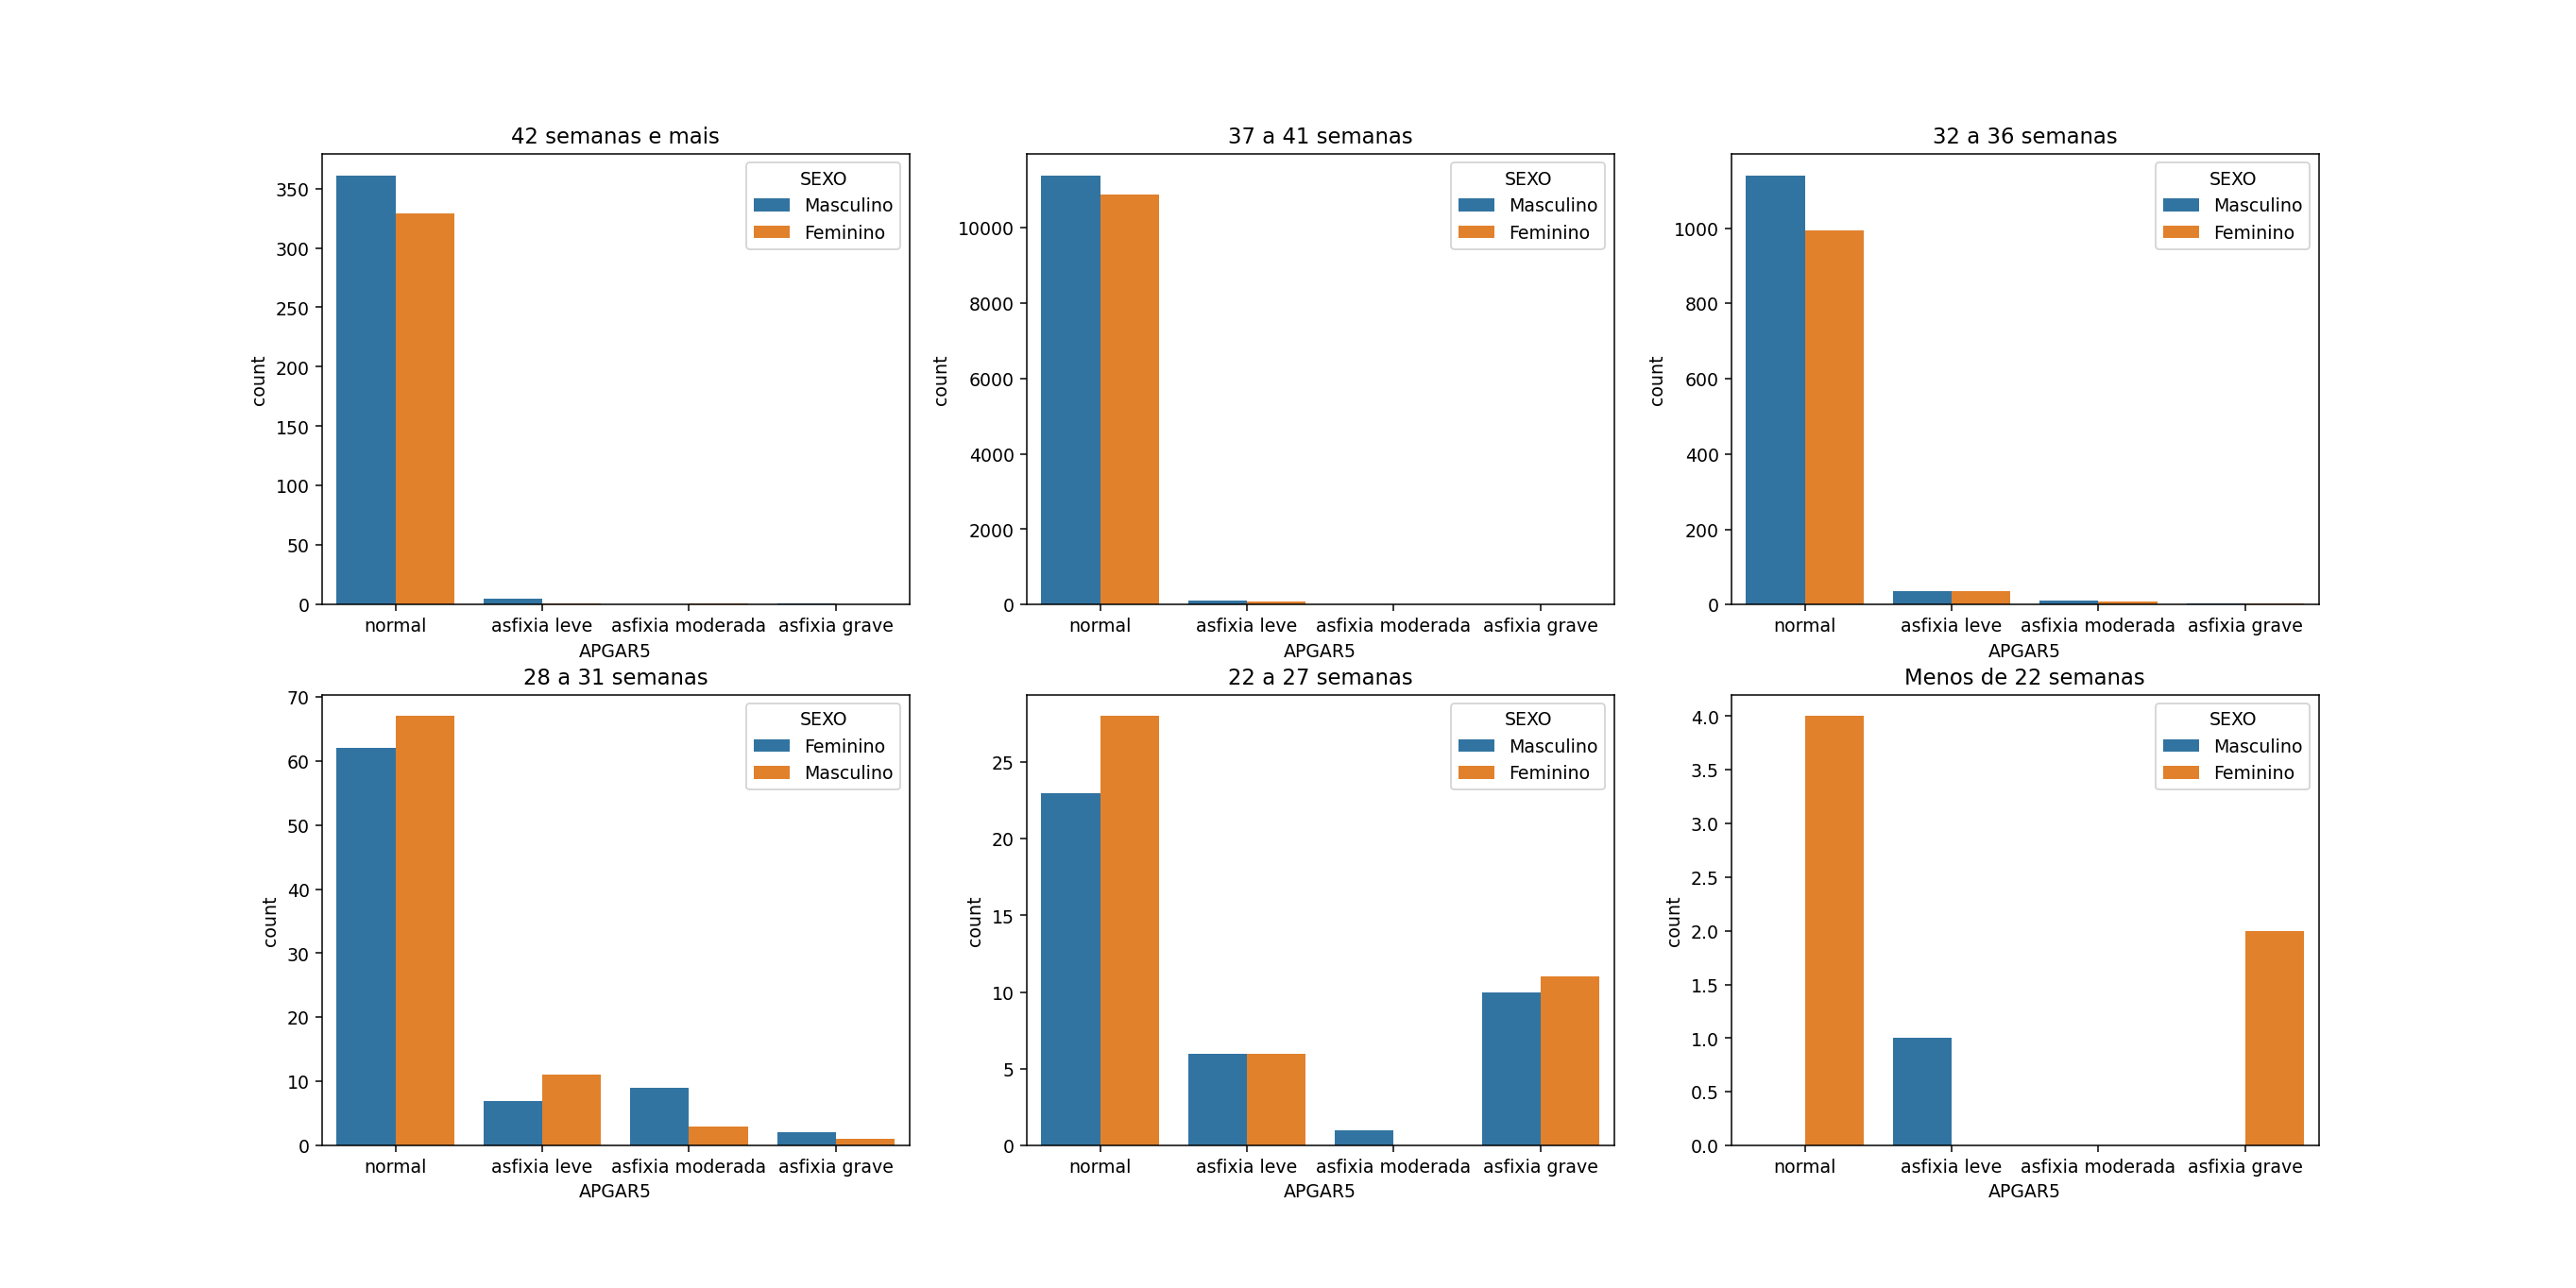

Text(0.5, 1.0, 'Menos de 22 semanas')

In [106]:
plt.rc("figure",figsize=(20,10))
fig,axes=plt.subplots(2,3)
ordem = ['normal','asfixia leve', 'asfixia moderada', 'asfixia grave']


sns.countplot(ax=axes[0,0],x="APGAR5",hue="SEXO",order=ordem,data=data[data["GESTACAO"]==gestacao[1]]).set_title(gestacao[1])
sns.countplot(ax=axes[0,1],x="APGAR5",hue="SEXO",order=ordem,data=data[data["GESTACAO"]==gestacao[0]]).set_title(gestacao[0])
sns.countplot(ax=axes[0,2],x="APGAR5",hue="SEXO",order=ordem,data=data[data["GESTACAO"]==gestacao[2]]).set_title(gestacao[2])
sns.countplot(ax=axes[1,0],x="APGAR5",hue="SEXO",order=ordem,data=data[data["GESTACAO"]==gestacao[4]]).set_title(gestacao[4])
sns.countplot(ax=axes[1,1],x="APGAR5",hue="SEXO",order=ordem,data=data[data["GESTACAO"]==gestacao[3]]).set_title(gestacao[3])
sns.countplot(ax=axes[1,2],x="APGAR5",hue="SEXO",order=ordem,data=data[data["GESTACAO"]==gestacao[-1]]).set_title(gestacao[-1])




nao consegui fazer o countplot porcentagem usando o stat='percent' e queria saber o pq ja que eu vi isso na documentação do countplot na documentação do seaborn

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [107]:
tb_AP5GES = pd.crosstab(data['GESTACAO'],data['APGAR5'])
print(tb_AP5GES)

APGAR5               asfixia grave  asfixia leve  asfixia moderada  normal
GESTACAO                                                                  
22 a 27 semanas                 21            12                 1      51
28 a 31 semanas                  3            18                12     129
32 a 36 semanas                  8            73                19    2134
37 a 41 semanas                 33           196                28   22266
42 semanas e mais                1             6                 1     690
Menos de 22 semanas              2             1                 0       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [108]:
tb_AP5GES_div = tb_AP5GES.div(tb_AP5GES.sum(axis=1),axis=0)*100
print(tb_AP5GES_div)

APGAR5               asfixia grave  asfixia leve  asfixia moderada     normal
GESTACAO                                                                     
22 a 27 semanas          24.705882     14.117647          1.176471  60.000000
28 a 31 semanas           1.851852     11.111111          7.407407  79.629630
32 a 36 semanas           0.358102      3.267681          0.850492  95.523724
37 a 41 semanas           0.146517      0.870222          0.124317  98.858944
42 semanas e mais         0.143266      0.859599          0.143266  98.853868
Menos de 22 semanas      28.571429     14.285714          0.000000  57.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [123]:
tb_AP5GES_div.index = ["22 a 27","28 a 31", "32 a 36","37 a 41","42 ou mais", "menos de 22"]
tb_AP5GES_div.reindex(["menos de 22","22 a 27","28 a 31", "32 a 36","37 a 41","42 ou mais"])

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
menos de 22,28.571429,14.285714,0.000000,57.142857
22 a 27,24.705882,14.117647,1.176471,60.000000
28 a 31,1.851852,11.111111,7.407407,79.629630
32 a 36,0.358102,3.267681,0.850492,95.523724
37 a 41,0.146517,0.870222,0.124317,98.858944
42 ou mais,0.143266,0.859599,0.143266,98.853868


<IPython.core.display.Javascript object>


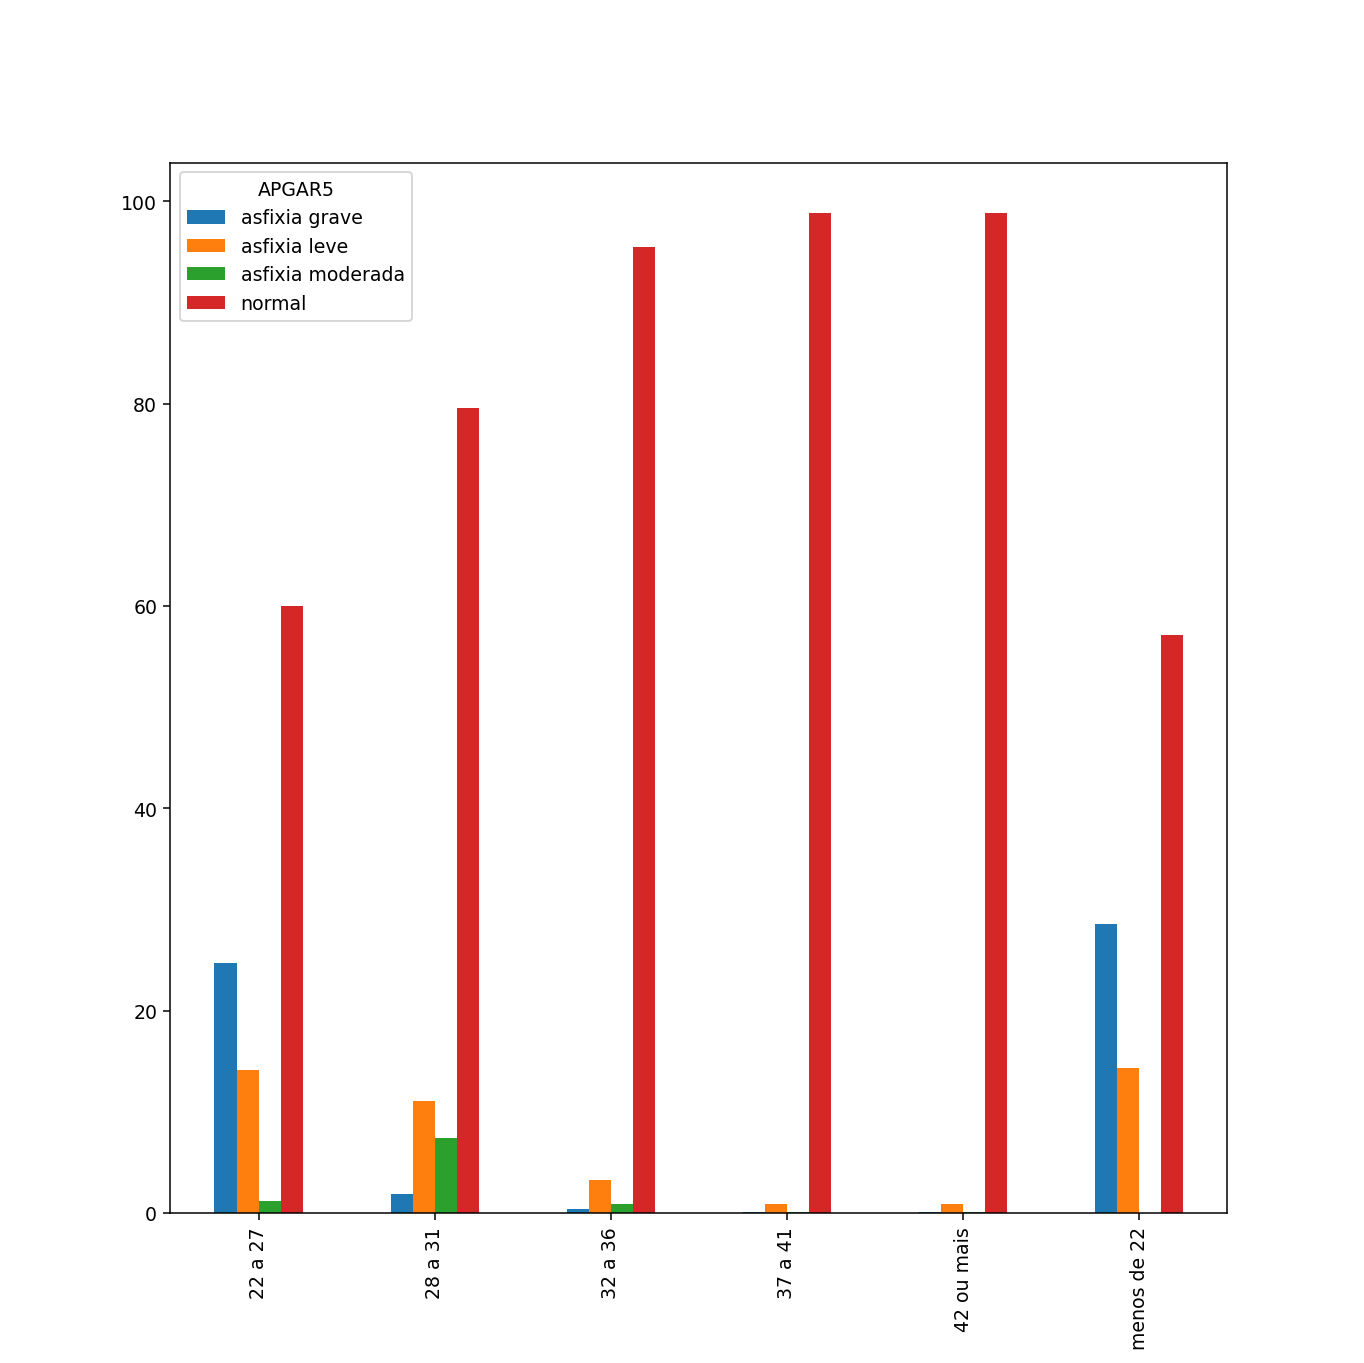

<Axes: >

In [124]:
plt.rc("figure",figsize=(10,10))
tb_AP5GES_div.plot.bar()


Os dados comprovam isso pois quando as gestações avançam as 36 semanas, a quantidade de asfixias graves e moderadas sao tao pequenas que nem chegam a aparecer no gráfico e as leves sao muito poucas também. Gostaria de saber como fazer para que as colunas fiquem ordenadas de começando do menos tempo de gestação até o maior tempo, ou seja, eu só precisaria mudar o menos de 22 de lugar para a primeira posição, redefinir a ordem dos index nao funcionou como eu achei q funcionaria.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<IPython.core.display.Javascript object>


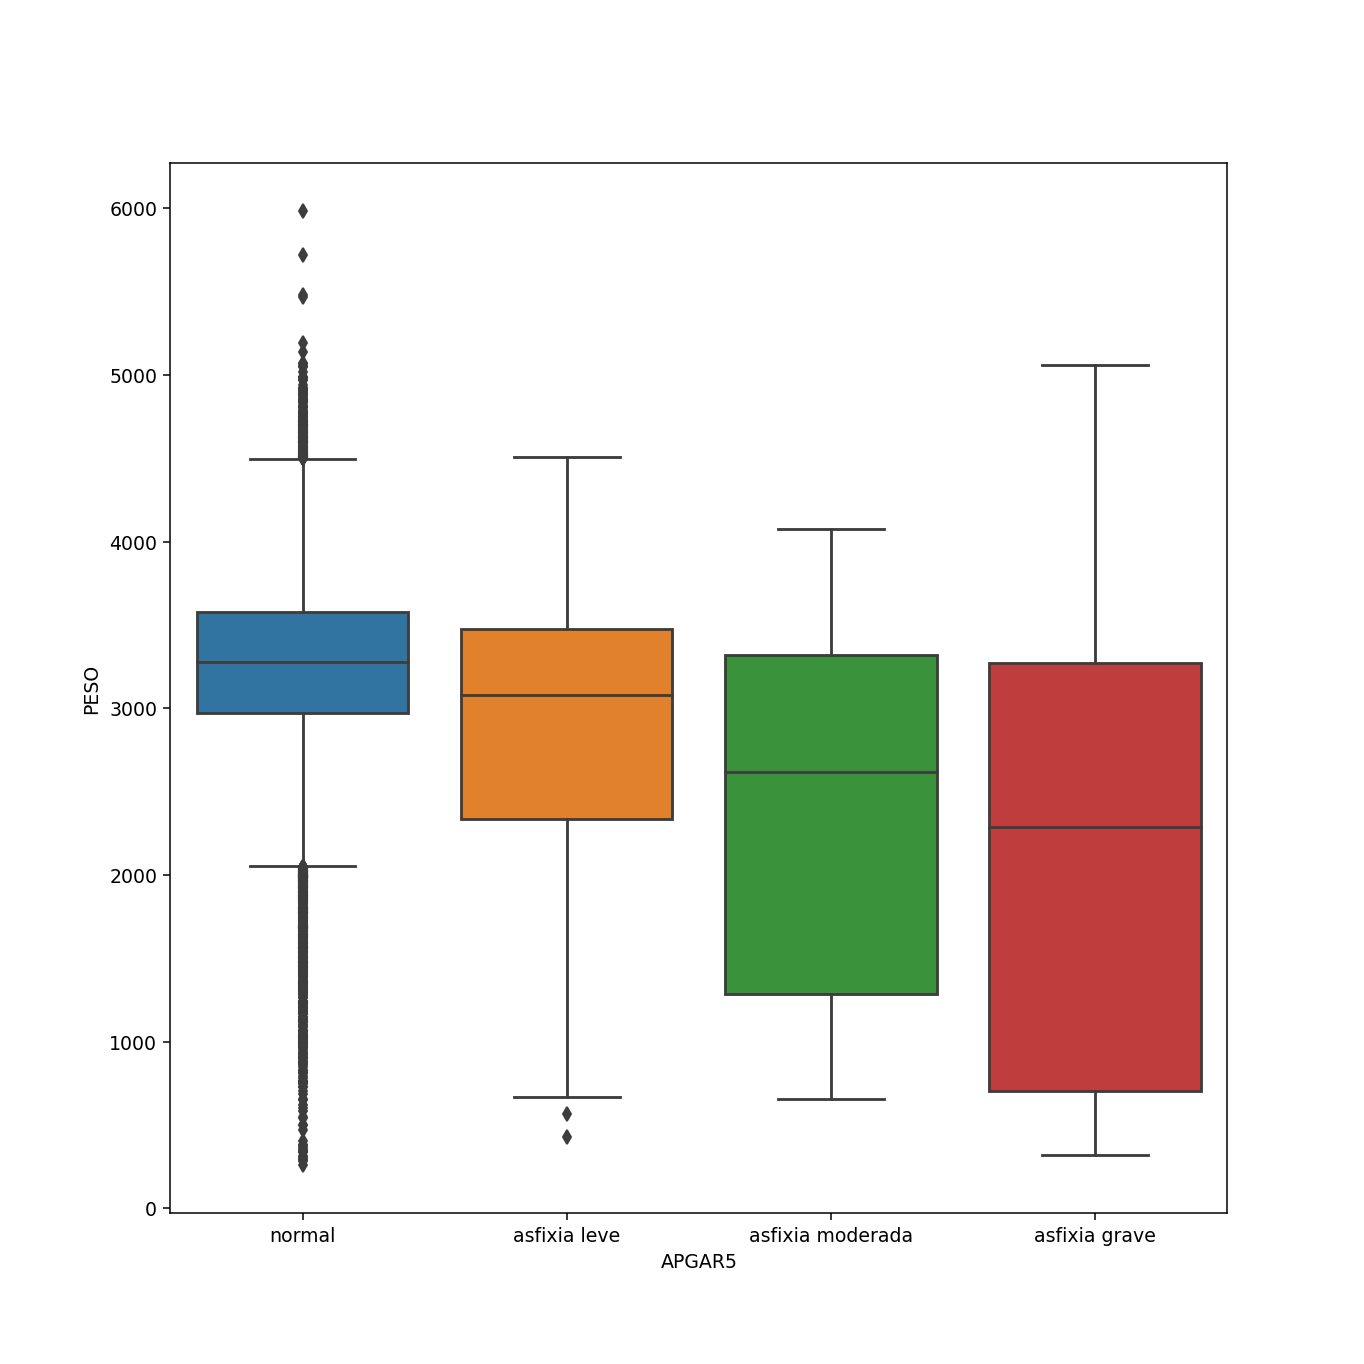

<Axes: xlabel='APGAR5', ylabel='PESO'>

In [126]:
plt.close('all')
plt.rc("figure",figsize=(10,10))
sns.boxplot(data=data, x= 'APGAR5',y='PESO',order=ordem)

Esse boxplot mostra que a asfixia é mais comum em bebes mais leves e quanto mais leve o bebê, pior pode ser sua asfixia. Mas ele também mostra que há bebês que tiveram asfixia grave que eram mais pesados.